<a href="https://colab.research.google.com/github/luoqianlin/misc/blob/main/YUV2BGR_Demo_Python%E5%AE%9E%E7%8E%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
%%sh
curl https://upload.wikimedia.org/wikipedia/zh/3/34/Lenna.jpg -o Lenna.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  156k  100  156k    0     0   673k      0 --:--:-- --:--:-- --:--:--  673k


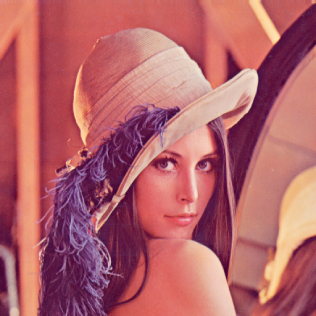

316 316


In [ ]:
img=cv2.imread('Lenna.jpg')
cv2_imshow(img)
height,width=img.shape[:2]
print(height,width)

## BGR -> YUV444


```
Y = 0.299 * R  + 0.587 * G  + 0.114 * B
U = -0.147 * R - 0.29*G  + 0.4359 * B + 0.5
V =0.615 * R - 0.515 * G - 0.1*B +0.5

```




In [ ]:
img = cv2.imread('Lenna.jpg')
img = (img / 255.0).astype(np.float32)#(316,316,3)
img_plannar = img.transpose(2, 0, 1)#（3,316,316）
b = img_plannar[0]
g = img_plannar[1]
r = img_plannar[2]
y_1 = 0.299 * r + 0.587 * g + 0.114 * b
u_1 = -0.147108*r - 0.28880402*g + 0.435912*b + 0.5
v_1 = 0.61477697*r - 0.514799*g - 0.099978*b + 0.5
yuv_image0 = np.stack([y_1, u_1, v_1], axis=0).transpose(1, 2, 0)#（3,316,316）->(316,316,3) 
yuv_image0 = yuv_image0.astype(np.float32)
yuv_image = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
delta = (np.abs(yuv_image - yuv_image0) < 1e-6).all()
print(f'delta:{delta}')

delta:True


$$
\left[
\begin{matrix}
Y \\
U \\
V
\end{matrix}
\right]
=
 \left[
 \begin{matrix}
   0.299 & 0.587 & 0.114 & 0 \\
   -0.147108 & -0.28880402 & 0.435912 & 0.5 \\
   0.61477697 & -0.514799 & -0.099978 & 0.5
  \end{matrix}
  \right]
*
\left[
\begin{matrix}
R \\
G \\
B \\
1
\end{matrix}
\right]
$$

In [ ]:
rgb_img = img[..., ::-1]
ones = np.ones((*rgb_img.shape[:2], 1), dtype=np.float32)
rgb_img = np.concatenate([rgb_img, ones], -1)#(316,316,4)
rgb_img = rgb_img[..., None]#(316,316,4,1)
print(rgb_img.shape)
rgb2yuv_coef = np.array([[0.299, 0.587, 0.114, 0],
                          [-0.147108, -0.28880402, 0.435912, 0.5],
                          [0.61477697, -0.514799, -0.099978, 0.5]
                          ], dtype=np.float32)
# rgb2yuv_coef = rgb2yuv_coef[None, None, ...]
# 3x4
yuv = rgb2yuv_coef @ rgb_img # (316,316,3,1)
print('yuv:', yuv.shape)
yuv = np.squeeze(yuv)
delta = (np.abs(yuv - yuv_image0) < 1e-6).all()
print(f'delta:{delta}')

(316, 316, 4, 1)
yuv: (316, 316, 3, 1)
delta:True


## YUV 4:4:4 -> RGB


```
R = Y + (V - 0.5) * 1.140
G = Y + (U - 0.5) * -0.395 + (V - 0.5) *  -0.581
B = Y + (U - 0.5) * 2.032 

```




delta:True


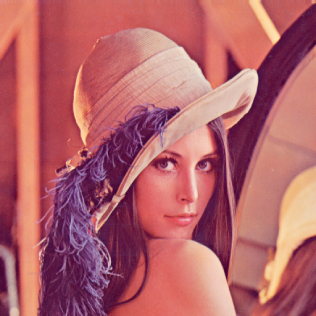

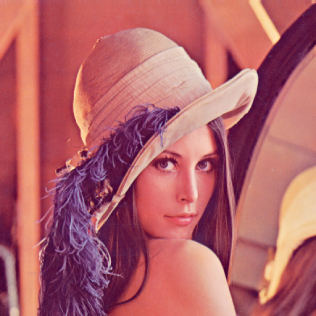

In [ ]:
img = cv2.imread('Lenna.jpg')
img = (img / 255.0).astype(np.float32)
yuv_image = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)#(316,316,3)
yuv_image = yuv_image.transpose(2, 0, 1)#(3,316,316)
y = yuv_image[0]
u = yuv_image[1]
v = yuv_image[2]
r = y + (v - 0.5) * 1.140
g = y + (u - 0.5) * -0.395 + (v - 0.5) * -0.581
b = y + (u - 0.5) * 2.032
bgr_image = np.stack([b, g, r], axis=0).transpose(1, 2, 0)#(3,316,316)->(316,316,3)
delta = (np.abs(bgr_image - img) < 1e-4).all()
print(f'delta:{delta}')
cv2_imshow(img*255)
cv2_imshow(bgr_image*255)

## RGB -> YUV420


```
Y = 0.257 * R + 0.504 * G + 0.098 * B + 16
U = -0.148 * R - 0.291 * G + 0.439 * B + 128
V = 0.439 * R - 0.368 * G - 0.071 * B + 128

```



(158, 158)
Y:(316, 316) U:(158, 158),yuv:(474, 316)
-->delta:94


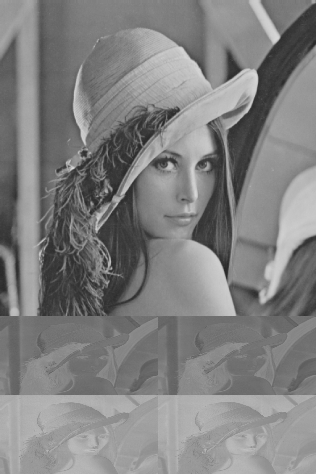

opencv yuv


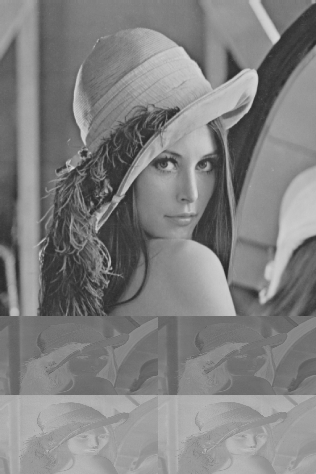

In [ ]:
img = cv2.imread('Lenna.jpg')
img_plannar = img.transpose(2, 0, 1)#(3,316,316)
b = img_plannar[0].astype(np.int32)
g = img_plannar[1].astype(np.int32)
r = img_plannar[2].astype(np.int32)

r_1 = r[0::2, 0::2] #(316/2,316/2)
g_1 = g[0::2, 0::2]
b_1 = b[0::2, 0::2]
print(r_1.shape)

Y = 0.257 * r + 0.504 * g + 0.098 * b + 16
U = -0.148 * r_1 - 0.291 * g_1 + 0.439 * b_1 + 128
V = 0.439 * r_1 - 0.368 * g_1 - 0.071 * b_1 + 128
#(316/2,316/2)->(316/4,316)
yuv_image = np.vstack([Y, U.reshape(-1, Y.shape[1]), V.reshape(-1, Y.shape[1])])#yuv_image->(316*1.5,316)
yuv_image = yuv_image.round().clip(0, 255).astype(np.uint8)
print(f'Y:{Y.shape} U:{U.shape},yuv:{yuv_image.shape}')
yuv_image_raw = cv2.cvtColor(img, cv2.COLOR_BGR2YUV_I420)#YUV420P
delta = (yuv_image_raw != yuv_image).sum()
print(f'-->delta:{delta.item()}')
cv2_imshow(yuv_image)
print('opencv yuv')
cv2_imshow(yuv_image_raw)


In [ ]:
316*1.5

474.0

## YUV420 -> RGB



```
Y = (Y - 16).clip(0) * 1.164
V = V - 128
U = U - 128
R = Y + 1.596 * V
G = Y - 0.813 * V - 0.391 * U
B = Y + 2.018 * U

```



image shape:(316, 316, 3)
Y:(316, 316),U:(316, 316),V:(316, 316) dtype:uint8
delta:313


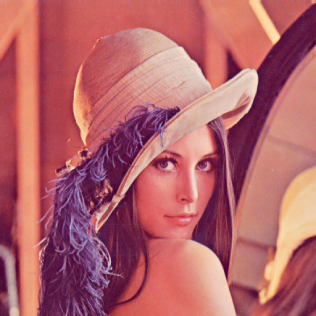

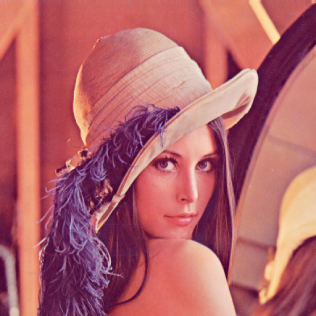

In [ ]:
img = cv2.imread('Lenna.jpg')
height, width = img.shape[:2]
print(f'image shape:{img.shape}')
yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV_I420)
target_img = cv2.cvtColor(yuv, cv2.COLOR_YUV2BGR_I420)
Y = yuv[:height]#(316,316)
U = yuv[height:height + int(0.25 * height)]#(316*0.25,316)
V = yuv[-int(0.25 * height):]#(316*0.25,316)

def repeat_component(X):
    X = X.reshape(X.shape[0] * 2, -1)#(316*0.5,316*0.5)
    X = X.repeat(2, axis=-1)
    X = X.repeat(2, axis=0)
    return X

U = repeat_component(U)
V = repeat_component(V)
print(f'Y:{Y.shape},U:{U.shape},V:{V.shape} dtype:{V.dtype}')
Y = Y.astype(np.int32)
U = U.astype(np.int32)
V = V.astype(np.int32)

Y = (Y - 16).clip(0) * 1.164
V = V - 128
U = U - 128

R = Y + 1.596 * V
G = Y - 0.813 * V - 0.391 * U
B = Y + 2.018 * U

def clip_uint8(V):
    return V.round().clip(0, 255).astype(np.uint8)

R = clip_uint8(R)
G = clip_uint8(G)
B = clip_uint8(B)
bgr_image = np.stack([B, G, R], axis=0).transpose(1, 2, 0)#(3,316,316)->(316,316,3)
delta = (np.abs(bgr_image.astype(np.int32) - target_img.astype(np.int32)) == 1).sum()
print(f'delta:{delta}')
cv2_imshow(target_img)
cv2_imshow(bgr_image)